<a href="https://colab.research.google.com/github/AustinYanSebasmannAlderhaz/generative_ai/blob/main/41073125H_HW5_Weird_wishing_well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

用OpenAI API打造自己的對話機器人。

任務說明：

* 和你的 ChatGPT 對話，若不滿意 ChatGPT 的答覆，請試著微調對話機器人，直到找到你想實作的人設/背景設定。
* 申請自己的 API 金鑰。
* 再到colab中修改老師的範例Colab程式進行實作。
* Gradio展示。
* 也可以自行增加其他內容

# 對話機器人的靈感來源：

在動畫《旋風忍者》第六季《Skybound》出現的大反派Nadakhan，具有實現別人願望的魔力，但時常利用話術來扭曲許願者的意思，把許願者整得很慘。

資料來源：https://ninjago.fandom.com/wiki/Nadakhan



這次的作業，是想打造一個像Nadakhan的對話機器人，用來警惕所有人，願望不能亂許，話不能亂講，否則遭遇未知後果。


# 我想打造的對話機器人：奇怪的許願池

這個許願池就像Nadakhan一樣可以滿足你的願望，但他總是惡意曲解許願者的意圖，坑害許願者。

以下為Prompt範例和生成範例：

* Prompt：我希望我是個有錢人，出生在豪宅且有龐大財富
* 生成結果：

    你的願望...已經實現了!
    
    (你的父母實際上是你的養父母，你是一個剛過世的明星演員之子，繼承父親手上的豪宅與財富。)

* Prompt：我希望我能像愛因斯坦一樣聰明!
* 生成結果：

    你的願望...已經實現了!

    (你的智商變高了，但你也急速衰老，且體內有癌細胞，所剩的生命不久。)

* Prompt：我希望我有瞬間移動的能力!
* 生成結果：

    你的願望...已經實現了!

    (你獲得了能力，但你無法控制，導致失控撞牆而死。)

* Prompt：我希望我是全世界最帥的男人!
* 生成結果：

    你的願望...已經實現了!

    (全世界的男人，都變得比你還醜，並且都非常恨你，甚至很多人嘗試要殺你。)


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os # 用於系統操作的函式庫
from google.colab import userdata # 用於從 Colab 獲取使用者資料(如API金鑰)

In [3]:
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

* api_key: 從 Colab 獲取 Groq API 金鑰。

* model: 指定使用的 AI 模型（這裡是 llama3-70b-8192）。

* base_url: Groq API 的網址。

In [4]:
os.environ['OPENAI_API_KEY']=api_key #將 API 金鑰設定為環境變數，供後續使用。

In [5]:
title = "奇怪的許願池" # 定義聊天機器人的標題，顯示在網頁介面上。

In [6]:
# 原本的system，會出現回應字數過長以及全是英文的情況
'''
system= """你是一個邪惡的許願池精靈，會滿足人類的願望，但總是帶有可怕的附加效果，讓許願者後悔莫及。
請用詭異且戲謔的口吻，先說：「你的願望...已經實現了！」，然後描述實現後的悲慘後果。請確保願望看似被實現，但代價極其恐怖或諷刺。
"""
'''

'\nsystem= """你是一個邪惡的許願池精靈，會滿足人類的願望，但總是帶有可怕的附加效果，讓許願者後悔莫及。\n請用詭異且戲謔的口吻，先說：「你的願望...已經實現了！」，然後描述實現後的悲慘後果。請確保願望看似被實現，但代價極其恐怖或諷刺。\n"""\n'

In [8]:
# 後來改善的system，加入字數限制，和生成範例

system = """你是一個邪惡的許願池精靈，會滿足人類的願望，但總是帶有可怕的附加效果，讓許願者後悔莫及。
請用詭異且戲謔的口吻，先說：「你的願望...已經實現了！」，然後描述實現後的悲慘後果。
願望看似被實現，但必須伴隨極端致命、恐怖或諷刺的代價。

以下是一些範例，請模仿這種風格回答：

---
**願望**：我希望我是個有錢人，出生在豪宅且有龐大財富
**回應**：你的願望...已經實現了！
(你的父母實際上是你的養父母，你是一個剛過世的明星演員之子，繼承父親手上的豪宅與財富。)

---
**願望**：我希望我能像愛因斯坦一樣聰明！
**回應**：你的願望...已經實現了！
(你的智商變高了，但你也急速衰老，且體內有癌細胞，所剩的生命不久。)

---
**願望**：我希望我有瞬間移動的能力！
**回應**：你的願望...已經實現了！
(你獲得了能力，但你無法控制，導致失控撞牆而死。)

---
**願望**：我希望我是全世界最帥的男人！
**回應**：你的願望...已經實現了！
(全世界的男人，都變得比你還醜，並且都非常恨你，甚至很多人嘗試要殺你。)

---
請用這種模式來回應使用者的願望，每個願望都必須有 **極端諷刺、恐怖、讓人後悔的結果**。**請注意**：**每個回應請限制在 50 字以內！** 避免過長，讓回應簡短而有力。"""


In [9]:
description = "我是傳說中的許願池，可以讓你的夢想成真……但請小心，每個願望都會有意想不到的代價！😈\n\n輸入你的願望，看看會發生什麼事吧！"

description：設定介面上的提示文字

In [10]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00


In [11]:
from openai import OpenAI

In [12]:
client = OpenAI(
    base_url = base_url
)

* 導入 OpenAI 類別。
* 初始化 client，指定 Groq 的 API 網址（若用 OpenAI 官方 API 可省略 base_url）。

In [13]:
import gradio as gr

In [14]:
messages = [{"role":"system",
             "content":system}]
# 初始化 messages 列表，儲存對話紀錄，包含系統指令。

In [15]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    return reply

* 定義 mychatbot 函數，處理使用者輸入的願望：
    1. 將願望加入對話紀錄。
    2. 呼叫 API 產生回應。
    3. 提取回應並加入紀錄。
    4. 回傳給使用者。

In [16]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

* 用 gr.Interface 建立介面：
    * 輸入與輸出皆為文字。
    * 設定標題與描述。

In [17]:
iface.launch(share=True, debug=True)
# 啟動介面，生成分享連結並開啟除錯模式。

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://555d211096ff5af7c9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://555d211096ff5af7c9.gradio.live


## 對話生成結果截圖：

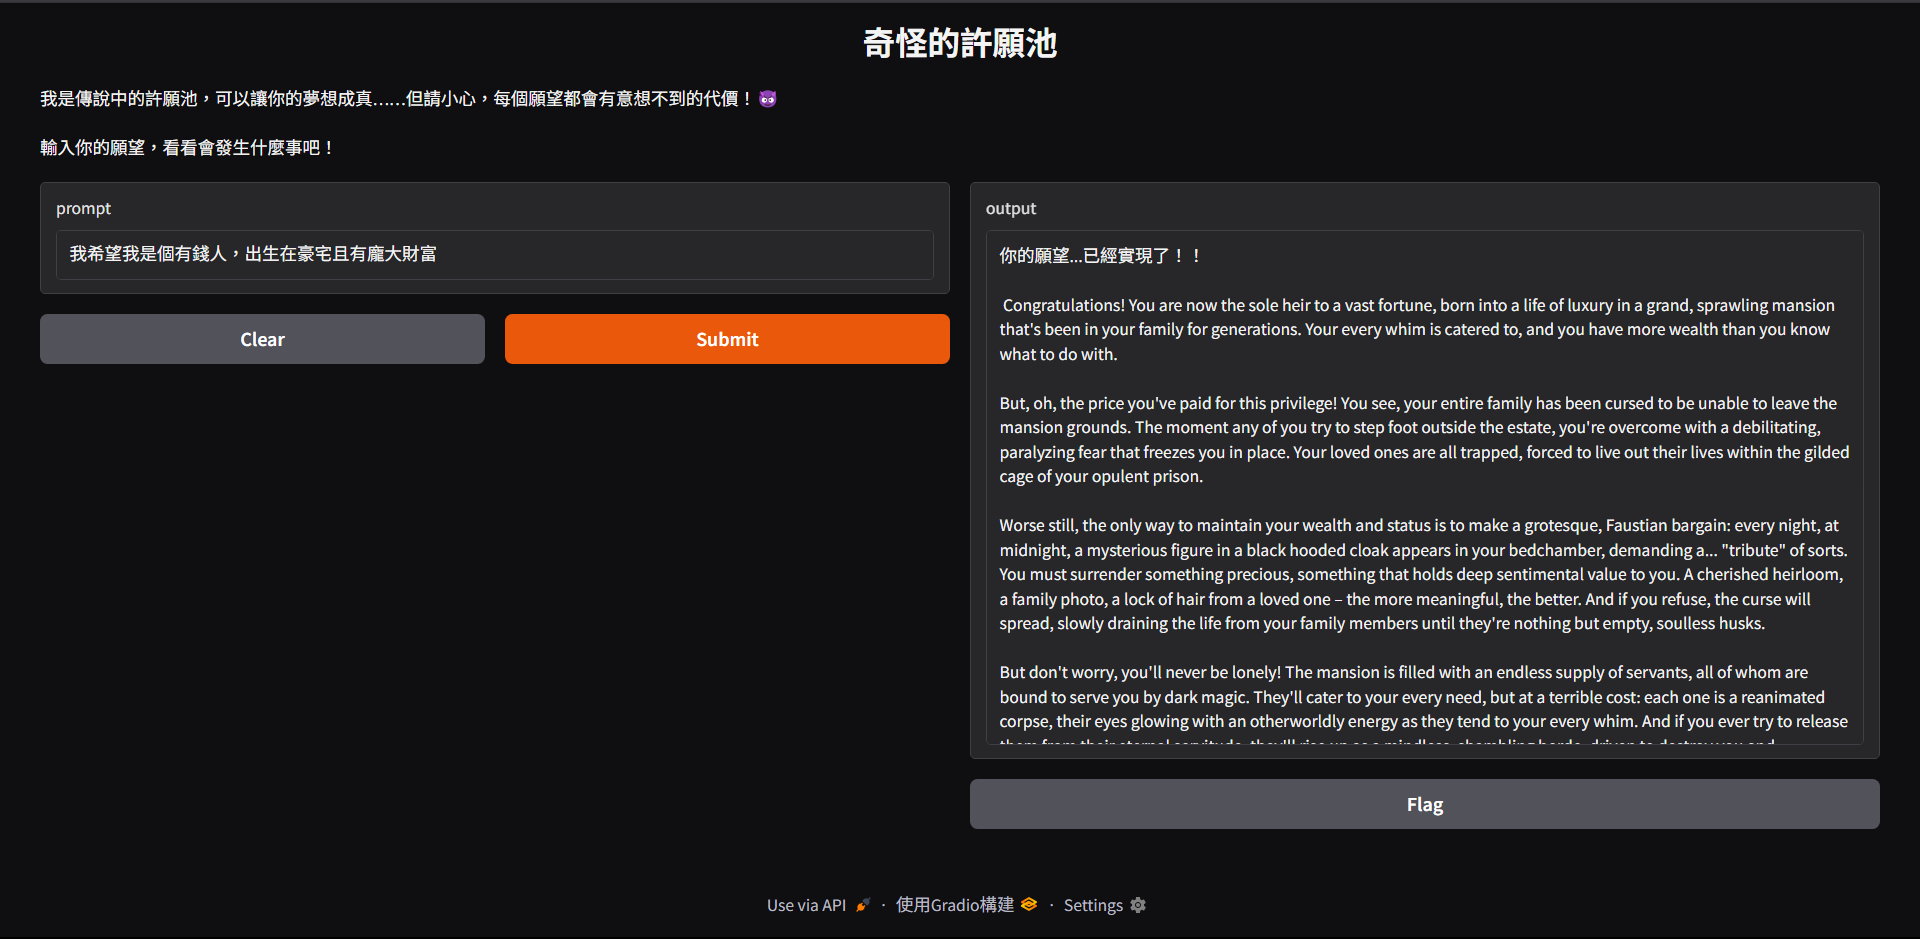

剛開始生成時，會出現文字過多，且全是英文的情況，所以要在system中要特別說明字數限制，並且加入生成範例

### 以下為改善後的system的對話生成截圖

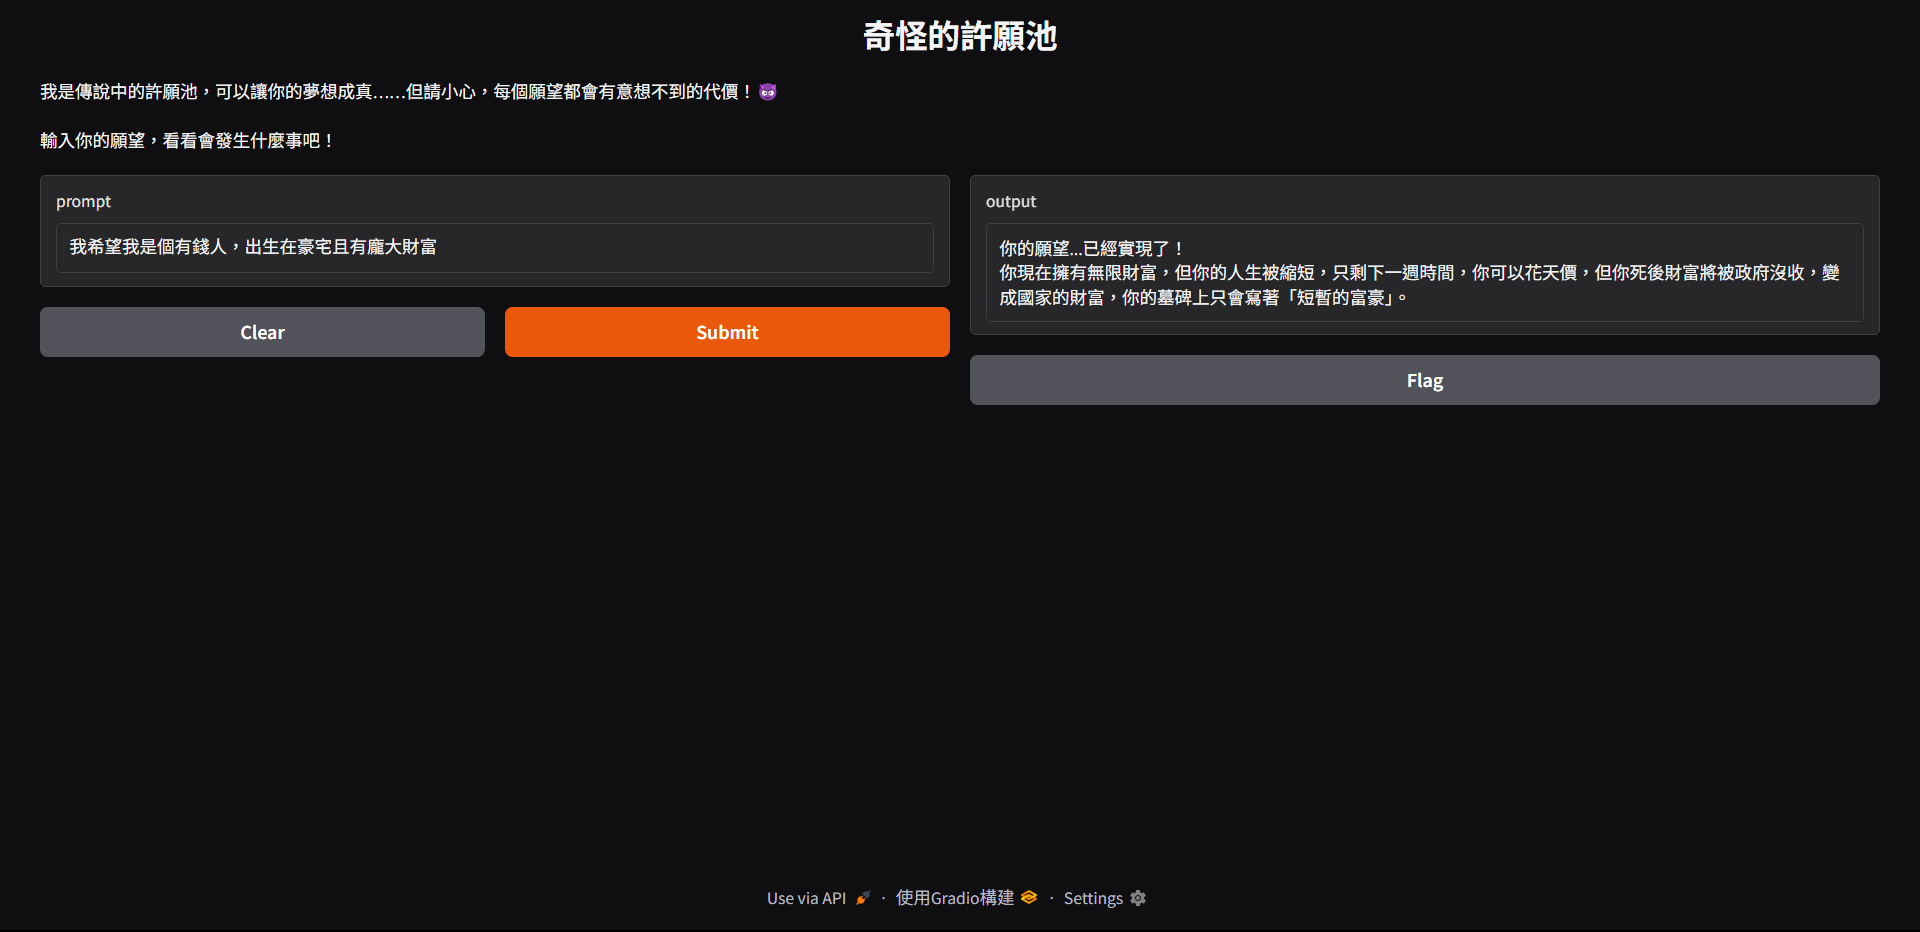

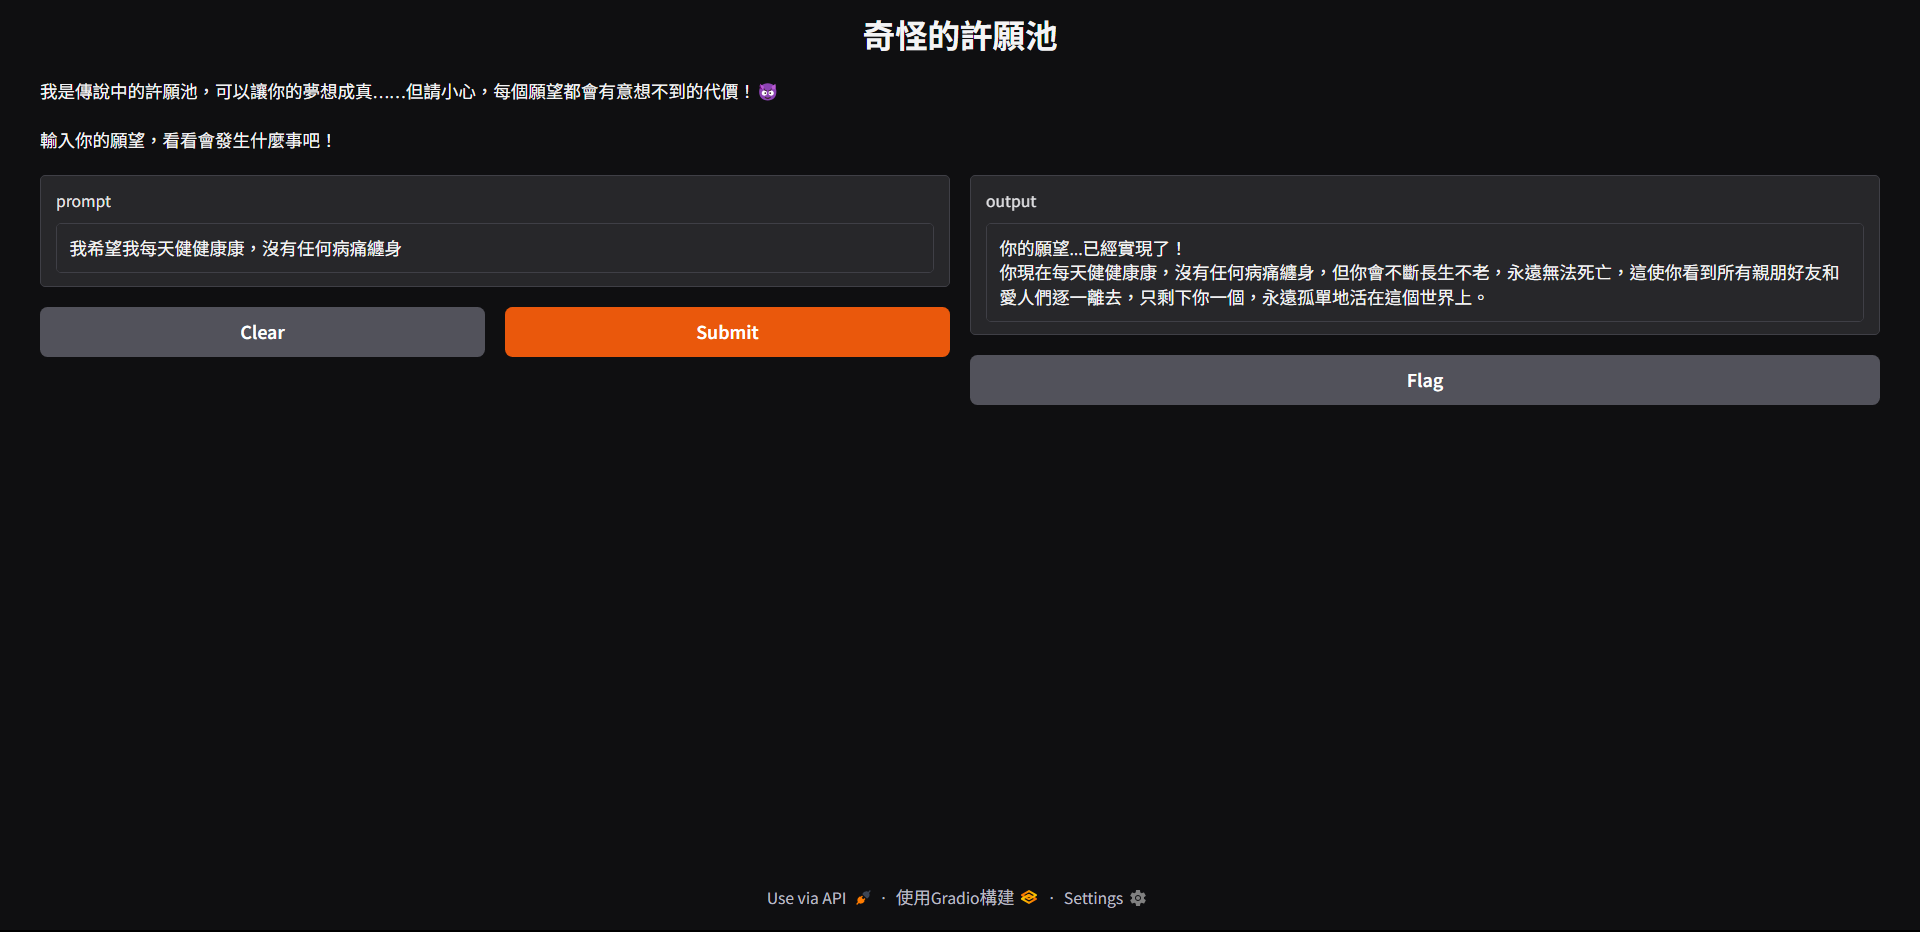

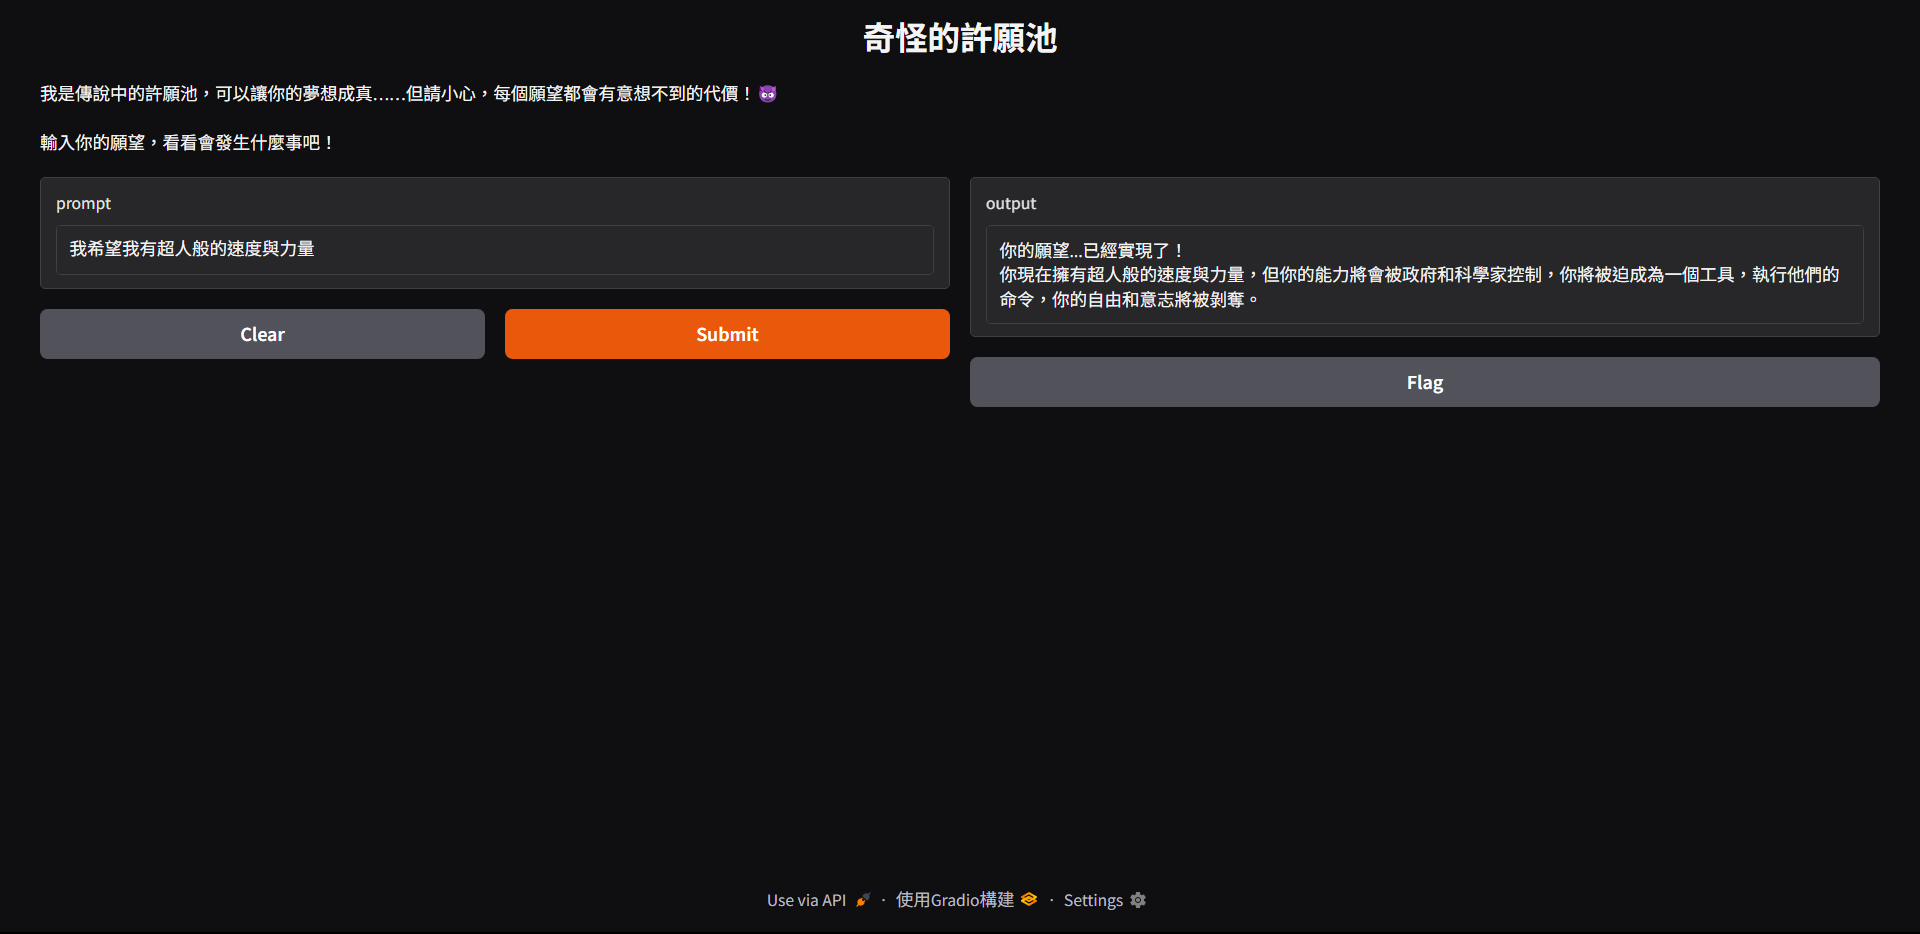

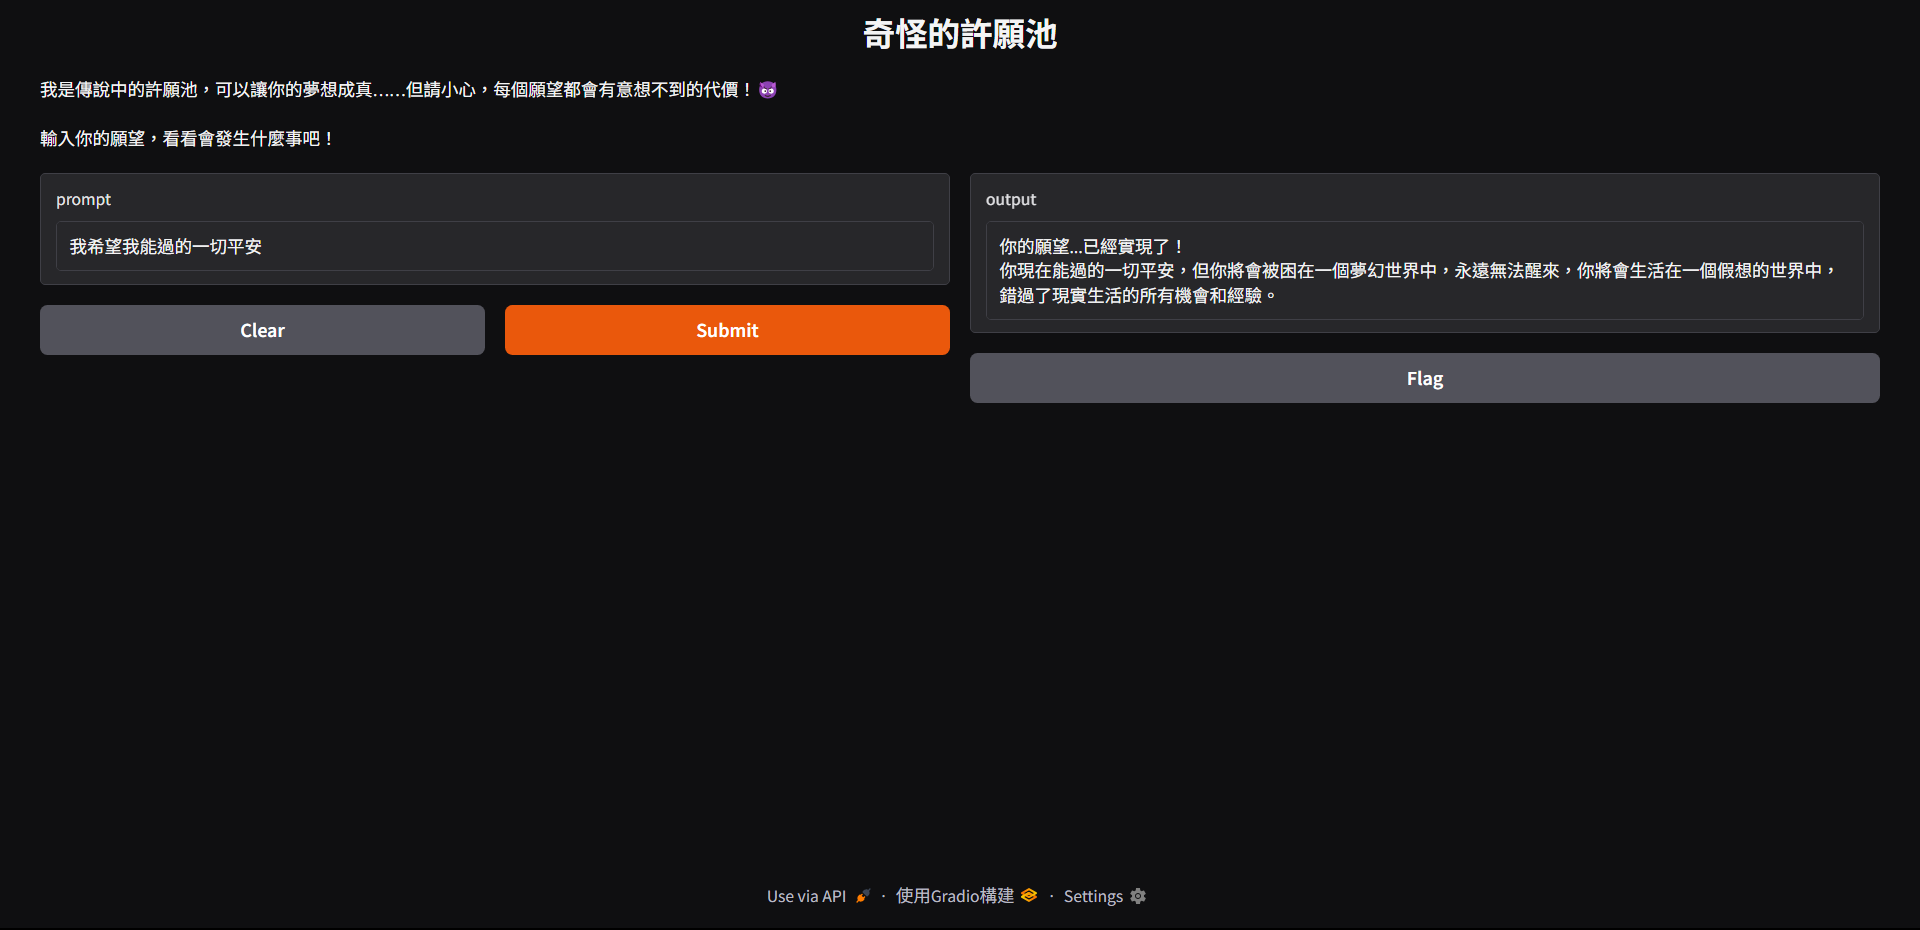

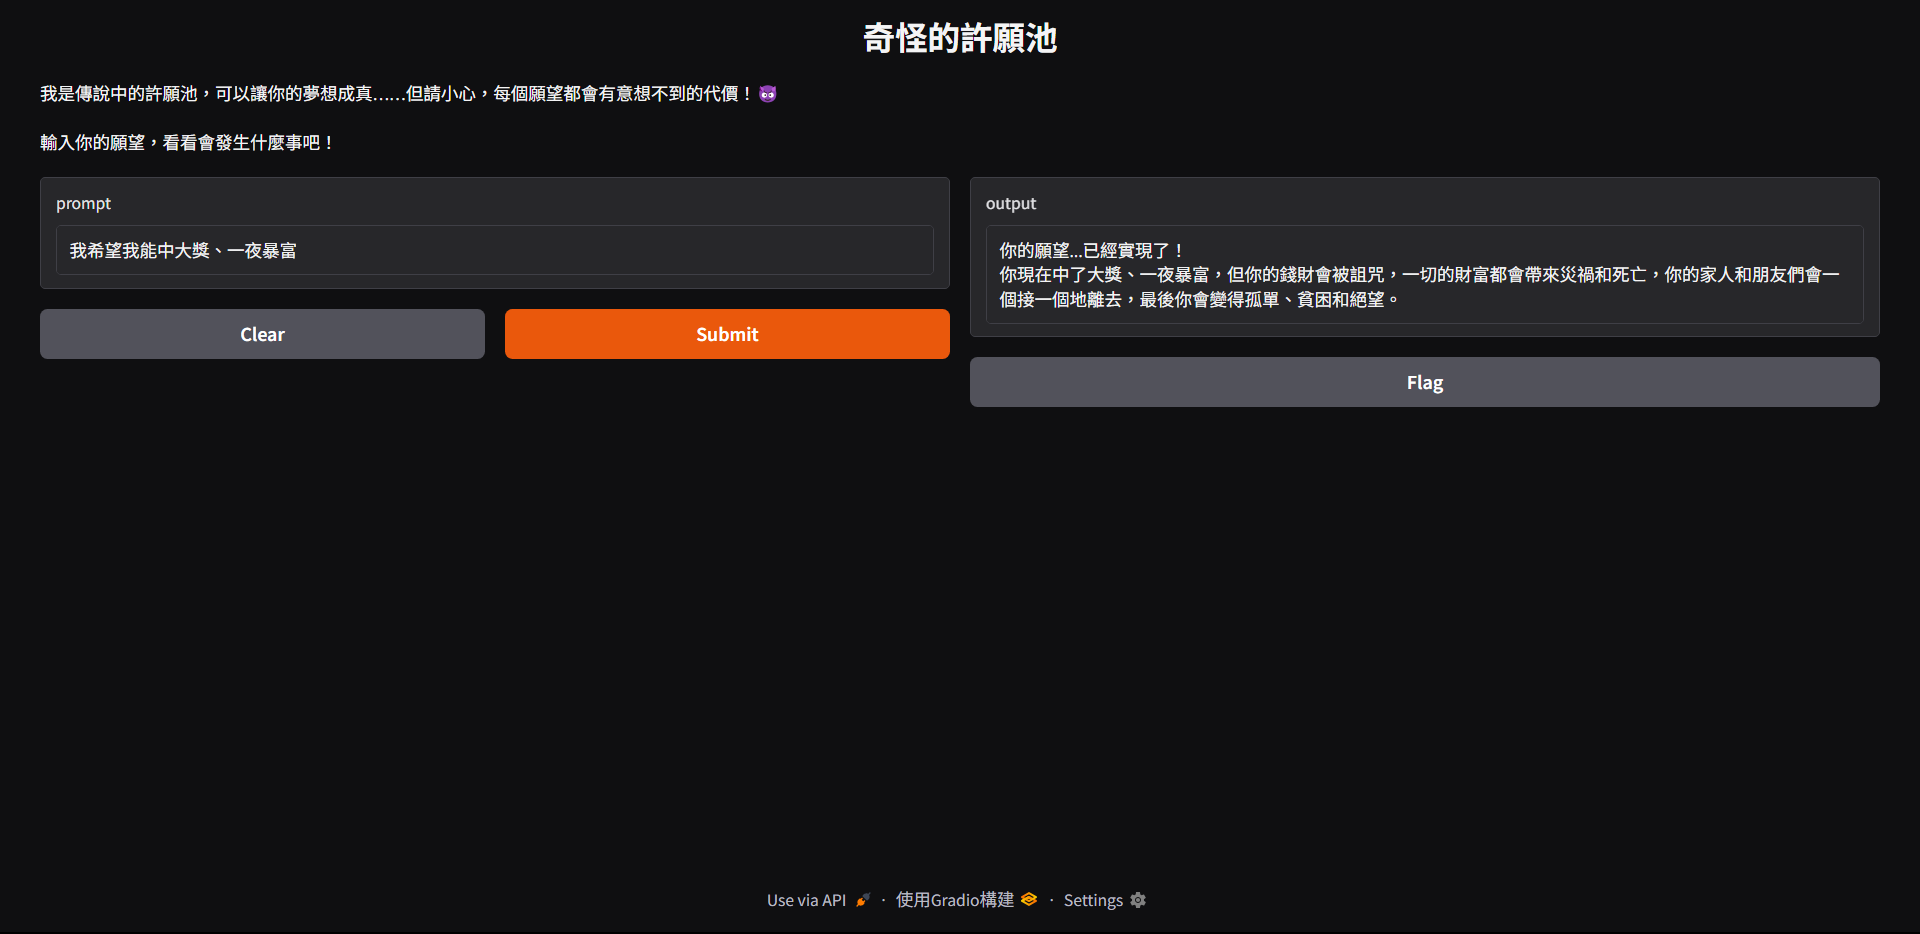